In [580]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def extract_effect_socres(path,verbose=False):
    vals = []
    names = []
    os.chdir(path)
    counter = 0
    for file in glob.glob("*.csv"):
        curr_set = pd.read_csv(path +"/"+ file)
        vals.extend(curr_set["effect_score"].tolist())
        names.extend((curr_set["effects_on_gene"] + curr_set["chromosome"].astype(str)+curr_set["position"].astype(str)+curr_set["allele1"]+curr_set["allele2"]).tolist())
        if verbose:
            counter+=1
            if counter % 1000 == 0:
                print(counter)
    return names, vals
print("done")

done


In [583]:
def find_dups(path,verbose=False):
    vals = []
    names = []
    results = {}
    os.chdir(path)
    counter = 0
    for file in glob.glob("*.csv"):
        curr_set = pd.read_csv(path +"/"+ file)
#         vals.extend(curr_set["effect_score"].tolist())
        for pos in (curr_set["chromosome"].astype(str)+","+curr_set["position"].astype(str)+","+curr_set["allele1"]+curr_set["allele2"]).tolist():
            if pos in results:
                print(file,results[pos], pos)
            else:
                results[pos] = file
        if verbose:
            counter+=1
            if counter % 1000 == 0:
                print(counter)
    return results
print("done")

done


In [581]:

path1 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_variants_per_gene"

res1 = extract_effect_socres(path1,True)
print("done")


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
done


In [447]:
print(res1[0][20])

4121958609AG


In [582]:
path2 = "/cs/labs/michall/nadavb/pwas_results/ukbb_imputation_variants_per_gene"

res2 = extract_effect_socres(path2,True)
print("done")

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
done


In [662]:
# find_dups(path2,True)

In [603]:
# assign data of lists.  
data1 = {'names': res1[0], 'val': res1[1]}  
data2 = {'names': res2[0], 'val': res2[1]}  
  
# Create DataFrame  
df1_raw = pd.DataFrame(data1)
df2_raw = pd.DataFrame(data2)

print("done")

done


In [604]:
found_on_both = []
df1_raw = df1_raw.drop_duplicates(subset="names")
df2_raw = df2_raw.drop_duplicates(subset="names")

df1_raw.set_index("names", inplace=True)
df2_raw.set_index("names", inplace=True)

for id in df1_raw.index:
    if id in df2_raw.index:
        found_on_both.append(id)
        
df1 = df1_raw[df1_raw.index.isin(found_on_both)]
df1 = df1.sort_index()
df2 = df2_raw[df2_raw.index.isin(found_on_both)]
df2 = df2.sort_index()
print(len(df1))
print(len(df2))

print("done")

628519
628519
done


In [597]:
# print(df1)
# print(df2)
# df3 = df1
# df3["val2"] = df2["val"]
# print(df3)
df1[df1.index.duplicated()]

,val
names,


In [605]:
mse =((np.array(list(df1["val"])) - np.array(list(df2["val"])))**2).mean()
print(mse)


0.007121756421214468


In [661]:
from scipy import stats

arr1 = np.array(df1["val"])
arr2 = np.array(df2["val"])
print(np.corrcoef(arr1,arr2))
stats.spearmanr(arr1[0:20],arr2[0:20])

[[1.         0.95811577]
 [0.95811577 1.        ]]


SpearmanrResult(correlation=0.793984962406015, pvalue=2.923733879684014e-05)

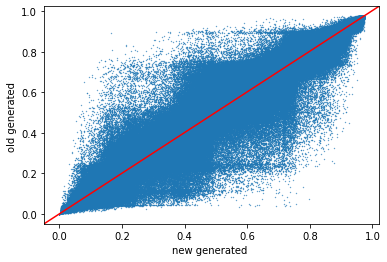

In [606]:

fig, ax = plt.subplots()
# ax.scatter(list(df1["val"][0:10000 ]), list(df2["val"][0:10000 ]),5)
# change to 2D histograme
# pierson/spierman 
ax.scatter(list(df1["val"]), list(df2["val"]),0.1)

plt.xlabel("new generated ")
plt.ylabel("old generated ")
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
# plt.ylim((0, 1.1))
# plt.xlim((0, 1.1))
plt.show()



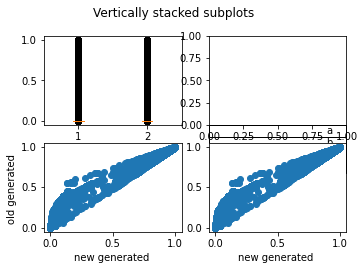

In [712]:
x = np.array(set1["dominant"])
y = np.array(set2["dominant"])

fig, axs = plt.subplots(2,2, sharex=False, sharey=False)
fig.suptitle('Vertically stacked subplots')
axs[1,0].scatter(x, y)
axs[1,0].set_xlabel("new generated ")
axs[1,0].set_ylabel("old generated ")
plt.subplots_adjust(left=0.2, bottom=0.2)

axs[1,1].scatter(x, y)
axs[1,1].set_xlabel("new generated ")
# axs[1,1].set_ylabel("old generated ")
axs[0,0].boxplot([x, y])
axs[0,0].set_xlabel("new generated")
axs[0,1].table(["a","b","c","d"])
# plt.setp(axs[0], xlabel='x axis label')
plt.show()
# ax.scatter(set1["dominant"], set2["dominant"])
# plt.xlabel("new generated ")
# plt.ylabel("old generated ")
# line = mlines.Line2D([0, 1], [0, 1], color='red')
# transform = ax.transAxes
# line.set_transform(transform)
# ax.add_line(line)
# plt.ylim((0, 1.1))
# plt.xlim((0, 1.1))
# plt.show()
# # plt.set_title("mean ")
# fig1, ax1 = plt.subplots()
# ax1.boxplot([set1["dominant"], set2["dominant"]])
# plt.xticks([1, 2], ['new results', 'old results'])
# plt.show()

# print(x.max(),x.min(),x.mean(),x.std())


In [726]:
def show_2dhist(x_raw,y_raw):
    x = np.array(x_raw)
    y = np.array(y_raw)
    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()

    fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
    fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
    ax = axs[0]
    hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.set_title("Hexagon binning")
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('counts')

    ax = axs[1]
    hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.set_title("With a log color scale")
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('log10(N)')

    plt.show()

print("done")

done


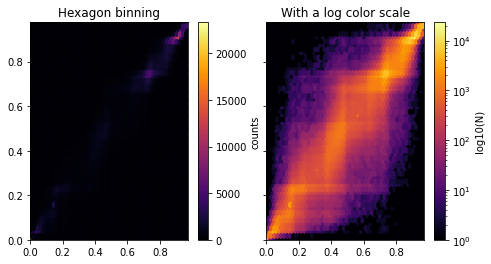

In [727]:
# plt.hexbin(list(df1["val"]), list(df2["val"]), gridsize=50, bins='log', cmap='inferno')
# plt.hexbin(list(df1["val"]), list(df2["val"]),bins='log', cmap='inferno')

# plt.show()
# plt.hexbin(list(df1["val"]), list(df2["val"]))
# plt.show()
show_2dhist(df1["val"],df2["val"])
# x = np.array(df1["val"])
# y = np.array(df2["val"])
# xmin = x.min()
# xmax = x.max()
# ymin = y.min()
# ymax = y.max()

# fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
# fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
# ax = axs[0]
# hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
# ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
# ax.set_title("Hexagon binning")
# cb = fig.colorbar(hb, ax=ax)
# cb.set_label('counts')

# ax = axs[1]
# hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
# ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
# ax.set_title("With a log color scale")
# cb = fig.colorbar(hb, ax=ax)
# cb.set_label('log10(N)')

# plt.show()


In [99]:
print("my_dataset")

my_dataset


In [313]:


# # bad - mean platete
# path1 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_gene_effect_scores/2724.csv"
# path2 = "/cs/labs/michall/nadavb/pwas_results/ukbb_imputation_gene_effect_scores/2639.csv"


# # # bad - mean platete
# path1 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_gene_effect_scores/776.csv"
# path2 = "/cs/labs/michall/nadavb/pwas_results/ukbb_imputation_gene_effect_scores/698.csv"

# # bad - mean platete
# path1 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_gene_effect_scores/729.csv"
# path2 = "/cs/labs/michall/nadavb/pwas_results/ukbb_imputation_gene_effect_scores/652.csv"


# # bad - lymph
path1 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_gene_effect_scores/3266.csv"
path2 = "/cs/labs/michall/nadavb/pwas_results/ukbb_imputation_gene_effect_scores/3154.csv"

# # good - Lymph
# path1 = "/cs/labs/michall/nadavb/pwas_results/ukbb_imputation_gene_effect_scores/17419.csv"
# path2 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_gene_effect_scores/17503.csv"
found_on_both = []
set1 = pd.read_csv(path1)
set1.set_index("sample_id", inplace=True)
set2 = pd.read_csv(path2)
set2.set_index("sample_id", inplace=True)
for id in set1.index:
    if id in set2.index:
        found_on_both.append(id)
        
set1 = set1[set1.index.isin(found_on_both)]
set2 = set2[set2.index.isin(found_on_both)]
set2 = set2.sort_index()
set1 = set1.sort_index()
print("done")

done


In [770]:
def full_2d_treatment(x_raw,y_raw):
    x = np.array(x_raw)
    y = np.array(y_raw)
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    plt.xlabel("new generated ")
    plt.ylabel("old generated ")
    line = mlines.Line2D([0, 1], [0, 1], color='red')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    plt.ylim((0, 1.1))
    plt.xlim((0, 1.1))
    plt.show()
    show_2dhist(x,y)
    # plt.set_title("mean ")
    fig1, (ax1,ax2) = plt.subplots(2,1)
    ax1.boxplot([x, y])
    ax1.set_ylim((0,1))
    ax1.set_xticks([1, 2])
    ax1.set_xticklabels( ['new results', 'old results'])
  
    collabel=("max", "min", "mean","std")
    the_table = ax2.table(cellText=[[x.max(),x.min(),x.mean(),x.std()],[y.max(),y.min(),y.mean(),y.std()]],colLabels=collabel,loc='center')
    ax2.axis('off')

    the_table.set_fontsize(32)
    the_table.scale(1.5, 1.5)
    plt.show()
print("done")

done


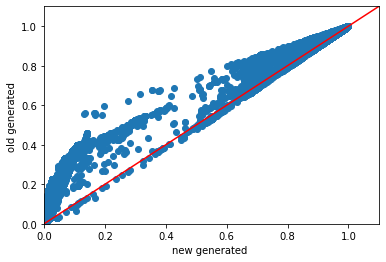

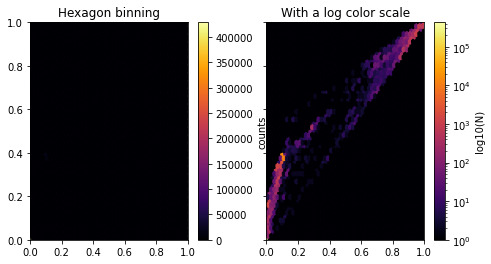

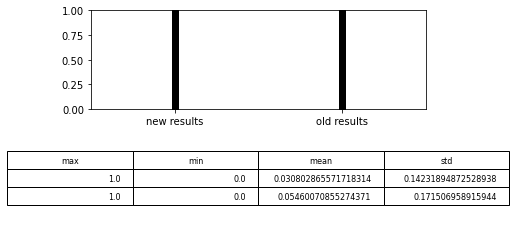

In [771]:
x = set1["dominant"]
y = set2["dominant"]
full_2d_treatment(x,y)



In [777]:
# bad Parkinsons
path1 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_gene_effect_scores/7078.csv"
path2 = "/cs/labs/michall/nadavb/pwas_results/ukbb_imputation_gene_effect_scores/6968.csv"



# # bad - prostate
# path1 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_gene_effect_scores/2724.csv"
# path2 = "/cs/labs/michall/nadavb/pwas_results/ukbb_imputation_gene_effect_scores/2639.csv"


# # # bad - mean platete
# path1 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_gene_effect_scores/776.csv"
# path2 = "/cs/labs/michall/nadavb/pwas_results/ukbb_imputation_gene_effect_scores/698.csv"

# # bad - mean platete
# path1 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_gene_effect_scores/729.csv"
# path2 = "/cs/labs/michall/nadavb/pwas_results/ukbb_imputation_gene_effect_scores/652.csv"


# # bad - lymph
# path1 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_gene_effect_scores/3266.csv"
# path2 = "/cs/labs/michall/nadavb/pwas_results/ukbb_imputation_gene_effect_scores/3154.csv"

# # good - Lymph
# path1 = "/cs/labs/michall/nadavb/pwas_results/ukbb_imputation_gene_effect_scores/17419.csv"
# path2 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_gene_effect_scores/17503.csv"
found_on_both = []
part_set1 = pd.read_csv(path1)
part_set1.set_index("sample_id", inplace=True)
part_set2 = pd.read_csv(path2)
part_set2.set_index("sample_id", inplace=True)
for id in part_set1.index:
    if id in part_set2.index:
        found_on_both.append(id)
part_set1 = part_set1[part_set1.index.isin(found_on_both)]
part_set2 = part_set2[part_set2.index.isin(found_on_both)]

in_mine = []
for id in set1.index:
    if id in my_dataset.index and my_dataset["Prostate cancer"][id] == 1.0 and\
    id in nadav_dataset.index and nadav_dataset["Prostate cancer"][id] == 1.0:
        in_mine.append(id)
        
part_set1 = part_set1[part_set1.index.isin(in_mine)]
part_set2 = part_set2[part_set2.index.isin(in_mine)]

part_set2 = part_set2.sort_index()
part_set1 = part_set1.sort_index()
print("done")
print(len(part_set1))

done
6134


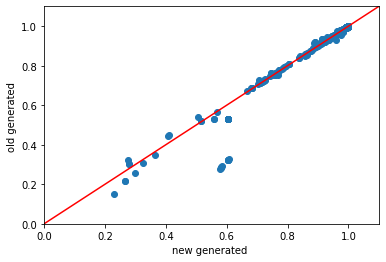

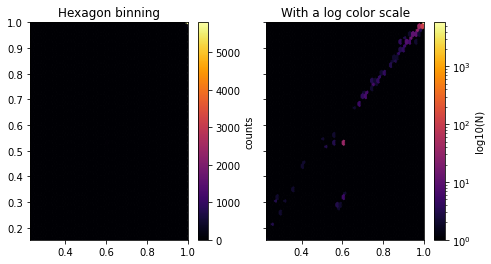

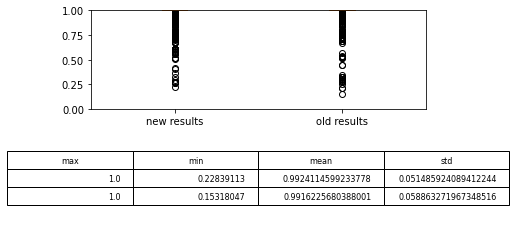

In [778]:

full_2d_treatment(part_set1["dominant"],part_set2["dominant"])
# full_2d_treatment([0.1,0.2,0.3,0.4,0.22,0.23,0.24,0.25],[0.1,0.2,0.3,0.4,0.22,0.23,0.24,0.25])